### Bag of Words

In [20]:
import numpy as np
from sklearn.model_selection import train_test_split

### kmeans.py

[2 0 0 2 0 0 1 2 1 0 1 0 2 2 2 2 1 1 2 1 0 1 1 2 2 0 0 2 1 2 0 2 0 0 2 2 0
 0 0 2 1 1 1 0 1 2 2 2 1 0 0 0 1 0 2 2 2 0 0 2 0 1 2 2 1 1 0 1 1 1 2 2 1 2
 1 2 2 2 2 2 2 2 0 2 0 0 2 0 2 0 1 0 2 1 2 1 2 2 2 0 0 2 1 1 1 1 0 0 1 2 0
 2 0 0 0 2 0 0 2 0 1 1 2 1 1 0 2 1 1 2 2 0 2 1 2 2 2 0 1 2 0 2 2 1 1 2 1 0
 0 0 0 0 2 2 0 1 2 1 2 1 0 1 1 2 1 2 2 1 2 1 1 0 0 2 0 1 2 0 1 1 0 0 0 1 1
 2 1 1 2 1 2 1 2 0 0 2 1 2 2 2 1 2 2 1 1 2 0 0 1 1 2 1 0 0 0 2 2 2 2 2 0 2
 1 0 0 1 1 2 2 0 0 1 0 1 0 0 0 1 1 2 1 1 0 1 1 2 1 1 1 2 1 2 0 0 2 2 2 2 2
 1 0 0 0 0 2 1 0 0 0 0 2 2 2 2 2 2 2 0 1 0 0 0 0 1 2 1 1 1 2 1 2 2 1 2 2 1
 2 0 2 0 1 2 0 0 0 0 2 1 2 1 1 2 1 0 1 2 1 0 1 0 1 1 0 2 1 2 1 2 0 1 2 0 2
 0 0 1 0 0 0 2 1 2 2 2 1 0 1 2 2 2 0 0 1 1 1 0 2 0 1 1 0 0 0 0 0 2 2 2 1 2
 2 0 0 0 2 1 2 1 0 1 2 2 0 2 1 0 1 1 1 0 2 1 1 1 1 2 2 1 2 0 1 2 2 1 1 0 2
 1 0 0 2 2 1 1 0 1 2 0 1 2 1 0 1 2 2 1 0 0 1 1 2 2 1 1 1 0 0 2 1 0 0 0 1 1
 2 0 1 2 1 0 2 2 0 2 1 1 2 1 0 2 1 0 1 0 2 2 1 1 0 0 0 1 1 2 2 1 1 0 2 1 1
 1 0 0 1 2 1 0 0 1 1 2 1 

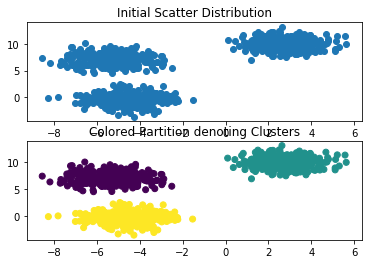

In [21]:
"""
Using SKLearns API for performing Kmeans clustering.
Using sklearn.datasets.make_blobs for generating randomized gaussians
for clustering.

"""

import numpy as np 
from matplotlib import pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs 

# create a dataset sample space that will be used
# to test KMeans. Use function : make_blobs
# 

n_samples = 1000
n_features = 5;
n_clusters = 3;

# aint this sweet 
X, y = make_blobs(n_samples, n_features) 
# X => array of shape [nsamples,nfeatures] ;;; y => array of shape[nsamples]

# X : generated samples, y : integer labels for cluster membership of each sample
# 
# 

# performing KMeans clustering

ret =  KMeans(n_clusters = n_clusters).fit_predict(X)
print(ret)

__, ax = plt.subplots(2)
ax[0].scatter(X[:,0], X[:,1])
ax[0].set_title("Initial Scatter Distribution")
ax[1].scatter(X[:,0], X[:,1], c=ret)
ax[1].set_title("Colored Partition denoting Clusters")
# plt.scatter
plt.show()



### Bag.py

In [22]:
import cv2
import numpy as np 
from glob import glob 
import argparse
#from helpers import *
from matplotlib import pyplot as plt 


class BOV:
    def __init__(self, no_clusters):
        self.no_clusters = no_clusters
        self.train_path = None
        self.test_path = None
        self.im_helper = ImageHelpers()
        self.bov_helper = BOVHelpers(no_clusters)
        self.file_helper = FileHelpers()
        self.imageCount = 0
        self.trainImageCount = 0
        self.train_labels = np.array([])
        self.name_dict = {}
        self.descriptor_list = []
        
        self.path = None
        self.gray = 0
        
        self.train_images = []
        self.train_img_names = []
        self.train_cls = []
        
        self.test_images = []
        self.test_img_names = []
        self.test_cls = []      

        self.predictions = []
        self.actual_labels=[]
        
    def dictionaryfy(self):
        train_dict = {}
        for i, image in enumerate(self.train_images):        
            cls = str(self.train_cls[i]).split('_')[0]
            if (cls not in train_dict):
                train_dict[cls] = []

            train_dict[cls].append(image)
        self.images = train_dict
        
        test_dict = {}
        for i, image in enumerate(self.test_images):        
            cls = str(self.test_cls[i]).split('_')[0]
            if (cls not in test_dict):
                test_dict[cls] = []

            test_dict[cls].append(image)
        self.testImages = test_dict
        
     
    def extractFeatures(self):
        # extract SIFT Features from each image
        print("train image count: ", self.trainImageCount)
        label_count = 0 
        for word, imlist in self.images.items():
            self.name_dict[str(label_count)] = word
            print("Computing Features for ", word)
            #print("List: ", imlist)
            for im in imlist:
                # cv2.imshow("im", im)
                # cv2.waitKey()
                self.train_labels = np.append(self.train_labels, label_count)
                #plt.figure()
                #plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
                
                kp, des = self.im_helper.features(im) #self.im_helper.gray(im)
                #des = self.im_helper.featuresPL(im)
                #print("featureV: ", featureV)
                #print("des: ", des)
                
                
                
                self.descriptor_list.append(des)

            label_count += 1
            
        #print(self.descriptor_list)
    
    def trainModel(self):
        """
        This method contains the entire module 
        required for training the bag of visual words model

        Use of helper functions will be extensive.

        """
        # perform clustering   
        bov_descriptor_stack = self.bov_helper.formatND(self.descriptor_list)
        print("Cluster")
        self.bov_helper.cluster()
        self.bov_helper.developVocabulary(n_images = self.trainImageCount, descriptor_list=self.descriptor_list)

        # show vocabulary trained
        self.bov_helper.plotHist()
 

        self.bov_helper.standardize()
        self.runCrossval()
        print("trainModel DONE.")

    def runCrossval(self):
        self.bov_helper.train(self.train_labels)
        
    def recognize(self,test_img, test_image_path=None):

        """ 
        This method recognizes a single image 
        It can be utilized individually as well.


        """

        kp, des = self.im_helper.features(test_img)
        #des = self.im_helper.featuresPL(im)
        # print kp
        #print(des.shape)

        # generate vocab for test image
        vocab = np.array( [[ 0 for i in range(self.no_clusters)]])
        # locate nearest clusters for each of 
        # the visual word (feature) present in the image
        
        # test_ret =<> return of kmeans nearest clusters for N features
        test_ret = self.bov_helper.kmeans_obj.predict(des)
        # print test_ret

        # print vocab
        for each in test_ret:
            vocab[0][each] += 1

        #print(vocab)
        # Scale the features
        vocab = self.bov_helper.scale.transform(vocab)

        # predict the class of the image
        lb = self.bov_helper.clf.predict(vocab)
        # print "Image belongs to class : ", self.name_dict[str(int(lb[0]))]
        return lb


    def getHistogramLabels(self):
        return self.bov_helper.getHistogramLabels()
        
    def testModel(self):
        """ 
        This method is to test the trained classifier

        read all images from testing path 
        use BOVHelpers.predict() function to obtain classes of each image

        """
        wordlist=[]
        #self.testImages, self.testImageCount = self.file_helper.getFiles(self.test_path)
        
        predictions = []
        #correct_labels = []
        for word, imlist in self.testImages.items():
            #print("processing " ,word)
            for im in imlist:
                # print imlist[0].shape, imlist[1].shape
                #correct_labels.append(self.name_dict_reverse[word])
                #print(im.shape)
                cl = self.recognize(im)
                #print(cl)
                predictions.append({
                    'image':im,
                    'class':cl,
                    'object_name':self.name_dict[str(int(cl[0]))]
                    })

        #print(predictions)
        #print("CORRECT LABELS:",correct_labels)
        predicted_labels=[]
        for cl in predictions:
            predicted_labels.append(int(cl['object_name']))
            
        print("PREDICTED: ",predicted_labels)
        print("ACTUAL: ",self.test_cls)
        prec=precision_score(self.test_cls, predicted_labels,average='weighted')
        acc=accuracy_score(self.test_cls, predicted_labels)
        f1=f1_score(self.test_cls, predicted_labels,average='weighted')
        #for each in predictions:
            # cv2.imshow(each['object_name'], each['image'])
            # cv2.waitKey()
            # cv2.destroyWindow(each['object_name'])
            # 
            #plt.imshow(cv2.cvtColor(each['image'], cv2.COLOR_GRAY2RGB))
            #plt.title(each['object_name'])
            #plt.show()
        return [prec,acc,f1]


    def print_vars(self):
        pass
    
    def loadFruits(self, path):
        self.path = path
        
        # read file. prepare file lists.
        self.train_images, self.train_img_names = self.file_helper.get_fruit_images(self.path)
        self.train_cls = [name.split('_')[0] for name in self.train_img_names]
        
        # train the model
        #self.trainModel()
        # test model
        #self.testModel()
    
    def trainTestSplit(self):
        self.train_images, self.test_images, self.train_cls, self.test_cls = train_test_split(self.train_images, self.train_cls, test_size=0.2, random_state=9253, stratify=self.train_cls)
        self.trainImageCount = len(self.train_images)
        self.testImageCount = len(self.test_images)
    
    def loadCars(self, path):
        self.path = path
        
        self.train_images, self.train_img_names = self.file_helper.get_car_images(self.path)
        self.train_cls = [0 if name.startswith('neg') else 1 for name in self.train_img_names]
        self.trainImageCount = len(self.train_images)
        
        
        self.test_images, self.test_img_names = self.file_helper.get_car_images(self.path, 'TestImages')
        self.test_cls = [0 if name.startswith('neg') else 1 for name in self.test_img_names]
        self.testImageCount = len(self.test_images)
        
        # set testing paths
        #self.test_path = test_path
        # train the model
        #self.trainModel()
        # test model
        #self.testModel()    

# if __name__ == '__main__':

#     # parse cmd args
#     parser = argparse.ArgumentParser(
#             description=" Bag of visual words example"
#         )
#     parser.add_argument('--train_path', action="store", dest="train_path", required=True)
#     parser.add_argument('--test_path', action="store", dest="test_path", required=True)

#     args =  vars(parser.parse_args())
#     print(args)

    
#     bov = BOV(no_clusters=100)

#     # set training paths
#     bov.train_path = args['train_path'] 
#     # set testing paths
#     bov.test_path = args['test_path'] 
#     # train the model
#     bov.trainModel()
#     # test model
#     bov.testModel()


### helper.py

In [23]:
import numpy as np 

from PIL import Image
import cv2

import requests
import zipfile
import tarfile
import io

import os
import glob

import gc

from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_validate
from sklearn.neural_network import MLPClassifier

class ImageHelpers:
    def __init__(self):
        self.sift_object = cv2.xfeatures2d.SIFT_create()

    def gray(self, image):
        plt.figure()
        plt.imshow(image)
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        return gray

    def colorRGB(self, image):
        colorRGB = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        return colorRGB
    
    def features(self, image):
        keypoints, descriptors = self.sift_object.detectAndCompute(image, None)
        return [keypoints, descriptors]
    
    def featuresPL(self, image):
        im = Image.fromarray(image)
        featureVector = im.histogram()
        return featureVector


class BOVHelpers:
    def __init__(self, n_clusters = 20):
        self.n_clusters = n_clusters
        self.kmeans_obj = KMeans(n_clusters = n_clusters)
        self.kmeans_ret = None
        self.descriptor_vstack = None
        self.mega_histogram = None
        self.train_labels = None
        self.clf  = LinearSVC(C=0.001, loss='squared_hinge', max_iter=100000, multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)  
    def getHistogramLabels(self):
        return [self.mega_histogram,self.train_labels]
    
    def cluster(self):
        """    
        cluster using KMeans algorithm, 

        """
        self.kmeans_ret = self.kmeans_obj.fit_predict(self.descriptor_vstack)

    def developVocabulary(self,n_images, descriptor_list, kmeans_ret = None):
        
        """
        Each cluster denotes a particular visual word 
        Every image can be represeted as a combination of multiple 
        visual words. The best method is to generate a sparse histogram
        that contains the frequency of occurence of each visual word 

        Thus the vocabulary comprises of a set of histograms of encompassing
        all descriptions for all images

        """

        self.mega_histogram = np.array([np.zeros(self.n_clusters) for i in range(n_images)])
        old_count = 0
        print("n_images:",n_images)
        print("descriptor_list length:", len(descriptor_list))
        
        for i in range(n_images):
            #print(i)
            l = len(descriptor_list[i])
            for j in range(l): 
                #print(i, j)
                if kmeans_ret is None:
                    #if (old_count+j==n_images):
                    #    print(old_count+j)
                    #    break;
                    #else: 
                    idx = self.kmeans_ret[old_count+j]
                else:
                    idx = kmeans_ret[old_count+j]
                #print("why are we still here")
                self.mega_histogram[i][idx] += 1
            old_count += l
        print("Vocabulary Histogram Generated")

    def standardize(self, std=None):
        """
        
        standardize is required to normalize the distribution
        wrt sample size and features. If not normalized, the classifier may become
        biased due to steep variances.

        """
        if std is None:
            self.scale = StandardScaler().fit(self.mega_histogram)
            self.mega_histogram = self.scale.transform(self.mega_histogram)
        else:
            print("STD not none. External STD supplied")
            self.mega_histogram = std.transform(self.mega_histogram)

    def formatND(self, l):
        """    
        restructures list into vstack array of shape
        M samples x N features for sklearn

        """
        #print("l: ")
        #print(l)
        
        vStack = np.array(l[0])
        for remaining in l[1:]:
            vStack = np.vstack((vStack, remaining))
        self.descriptor_vstack = vStack.copy()
        return vStack

    def train(self, train_labels):
        """
        uses sklearn.svm.SVC classifier (SVM) 


        """
        #print("Training SVM")
        #print(self.clf)
        #print("Train labels", train_labels)
        #self.clf.fit(self.mega_histogram, train_labels)
        self.train_labels=train_labels
        self.clf.fit(self.mega_histogram, train_labels)
        names = ["Nearest Centroid", "Linear SVM","Decision Tree", "Naive Bayes","MLP"]
        classifiers = [NearestCentroid(metric="euclidean"),LinearSVC(dual=False),DecisionTreeClassifier(),GaussianNB(),MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5,2), random_state=1)]
        
        for name, clf in zip(names, classifiers):
            scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
            scores = cross_validate(clf, self.mega_histogram, train_labels, cv=5, scoring=scoring,return_train_score=True)
            print(name," -- Training Set --", "Mean Accuracy", scores['train_acc'].mean())
            print(name," -- Test Set --", "Mean Accuracy", scores['test_acc'].mean())
            print(name," -- Training Set --", "Mean Precision", scores['train_prec'].mean())
            print(name," -- Test Set --", "Mean Precision", scores['test_prec'].mean())
            print(name," -- Training Set --", "Mean Recall", scores['train_rec'].mean())
            print(name," -- Test Set --", "Mean Recall", scores['test_rec'].mean())
        print("Training completed")

    def predict(self, iplist):
        predictions = self.clf.predict(iplist)
        return predictions

    def plotHist(self, vocabulary = None):
        print("Plotting histogram")
        if vocabulary is None:
            vocabulary = self.mega_histogram

        x_scalar = np.arange(self.n_clusters)
        y_scalar = np.array([abs(np.sum(vocabulary[:,h], dtype=np.int32)) for h in range(self.n_clusters)])

        print(y_scalar)

        plt.bar(x_scalar, y_scalar)
        plt.xlabel("Visual Word Index")
        plt.ylabel("Frequency")
        plt.title("Complete Vocabulary Generated")
        plt.xticks(x_scalar + 0.4, x_scalar)
        plt.show()

class FileHelpers:

    def __init__(self):
        pass
    
    def resize_images(self,images):
        """
        used to resize all images to the mean height/width
        note that this is prone to generating distorted images
        better results are expected with methods like pyramid pooling (https://arxiv.org/abs/1406.4729)
        """
        target_size = 200
        mean_shape = np.mean([[i.shape[0],i.shape[1]] for i in images], axis=0)
        max_v = max(mean_shape[0], mean_shape[1])
        # scale by preserving average ratio
        target_height = int(target_size * mean_shape[0]/max_v)
        target_width = int(target_size * mean_shape[1]/max_v)
        for i in range(len(images)):
            images[i] = np.array(Image.fromarray(images[i]).resize((target_width, target_height), Image.ANTIALIAS))
            print("Resized {} fruit images".format(i), end="\r")

        return images
    
    def get_car_images(self, car_data_path, folder = 'TrainImages'):
        print(car_data_path, folder)
        p = os.path.join(car_data_path,folder,'*.pgm')
        files = glob.glob(p)
        print("Found {} car files".format(len(files)))
        images = []
        image_names = []

        for filename in files:
            image_names.append(os.path.basename(filename))
            with Image.open(filename) as img:
                images.append(np.array(img))

        return np.array(images), image_names

    def get_fruit_images(self, fruits_data_path):
        images = []
        image_names = []
        cnt=0

        for dirpath, dirnames, filenames in os.walk(fruits_data_path):
            for filename in [f for f in filenames if f.endswith(".jpg")]:
                cnt = cnt+1
                with Image.open(os.path.join(dirpath,filename)) as img:
                    if img.format != "JPEG":
                        # we only want 3 channels
                        img = img.convert("RGB")
                    np_img = np.array(img)
                    if len(np_img.shape) != 3 or np_img.shape[2] != 3:
                        # incorrectly imported/converted RGB file
                        continue
                    images.append(np_img)
                    image_names.append(os.path.split(dirpath)[-1] + "_" + filename)
                    print("Found {} fruit files".format(len(image_names)), end="\r")
        
        
        images = np.stack(self.resize_images(images), axis=0)

        return images, image_names
    
    def getFiles(self, path):
        """
        - returns  a dictionary of all files 
        having key => value as  objectname => image path

        - returns total number of files.

        """
        imlist = {}
        count = 0
        for each in glob(path + "*"):
            each = each.replace("\\", "/")
            word = each.split("/")[-1]
            print(" #### Reading image category ", word, " ##### ")
            imlist[word] = []
            for imagefile in glob(path+word+"/*"):
                imagefile = imagefile.replace("\\", "/")
                print("Reading file ", imagefile)
                
                
                im = Image.open(imagefile)
                if (im.format != "JPEG"):
                    im = im.convert("RGB")
                np_im = np.array(im)
                if len(np_im.shape) != 3 or np_im.shape[2] != 3:
                    # incorrectly imported/converted RGB file
                    continue
                
                #im = cv2.imread(imagefile,1)
                
                #plt.imshow(im)
                imlist[word].append(np_im)
                count +=1 

        return [imlist, count]



### Load images

In [26]:
cars = BOV(no_clusters=100)
cars.loadCars("../../../ex3/CarData/")
fruits = BOV(no_clusters=100)
fruits.loadFruits("../../ex3/FIDS30/")

../../../ex3/CarData/ TrainImages
Found 1049 car files
../../../ex3/CarData/ TestImages
Found 170 car files


Text(0.5,1,'Colour Histogram, using PIL')

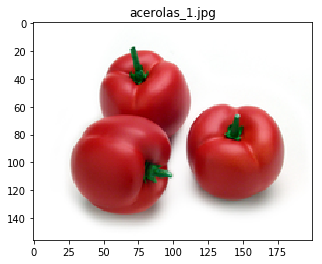

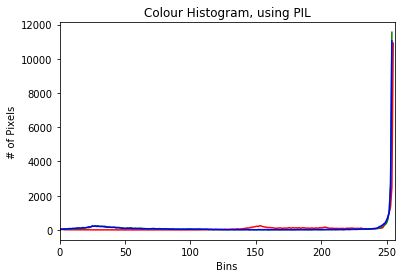

In [27]:
im = Image.fromarray(fruits.train_images[0])
plt.imshow(im)
plt.title(fruits.train_img_names[0])

featureVector = im.histogram()

plt.figure()
plt.plot(featureVector[:256], 'r')
plt.plot(featureVector[257:512], 'g')
plt.plot(featureVector[513:], 'b')
plt.xlim([0, 256])
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.title("Colour Histogram, using PIL")

### Train/test split

In [28]:
print("{} unique classes for cars".format(len(set(cars.train_cls))))
print("{} unique classes for fruits".format(len(set(fruits.train_cls))))

fruits.trainTestSplit()

2 unique classes for cars
30 unique classes for fruits


Text(0.5,1,'watermelons')

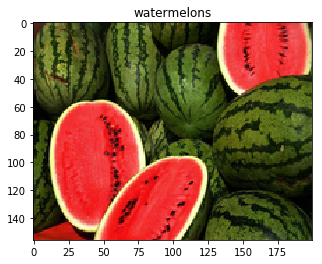

In [29]:
cars.dictionaryfy()
fruits.dictionaryfy()
im = Image.fromarray(fruits.images['watermelons'][0])
plt.imshow(im)
plt.title('watermelons')

### Fruits

In [30]:
%time fruits.extractFeatures()

train image count:  774
Computing Features for  pomegranates
Computing Features for  mangos
Computing Features for  apples
Computing Features for  cherries
Computing Features for  cantaloupes
Computing Features for  olives
Computing Features for  grapes
Computing Features for  peaches
Computing Features for  passionfruit
Computing Features for  tomatoes
Computing Features for  guava
Computing Features for  pineapples
Computing Features for  strawberries
Computing Features for  oranges
Computing Features for  bananas
Computing Features for  watermelons
Computing Features for  blueberries
Computing Features for  avocados
Computing Features for  limes
Computing Features for  acerolas
Computing Features for  grapefruits
Computing Features for  coconuts
Computing Features for  apricots
Computing Features for  raspberries
Computing Features for  figs
Computing Features for  kiwifruit
Computing Features for  blackberries
Computing Features for  pears
Computing Features for  plums
Computing Fe

Cluster
n_images: 774
descriptor_list length: 774
Vocabulary Histogram Generated
Plotting histogram
[1629 1168 1767 1239 1214 2063 1470 1032 1579 2463 1320 1628 1278 1443
 1559 1671 1167 1475 1287 1541 1392 1712 1478 1674 1799 2426 1189 1514
 1282 2103 1403 1330 1757 1469 1357 1460 2002 1418 1550 1317 1404 2099
 1283 1282 1968 1210 1539 1428 1476 1407 1410 1294 1196 1198 1231 1515
 1536 1660 1722 2204 1581 1564 1155 2887 1210 1385 1669 1450 1676 1398
 1125 1356 1553 1333 1690 1686 1446 1706 1309 1177 1559 1654 1540 1424
 1191 1840 1338 1325 1558 1683 1295 1483 1490 1442 1503 1235 1324 1710
 1667 2485]


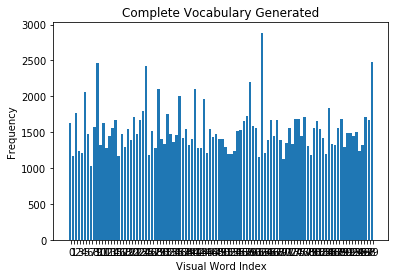

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Nearest Centroid  -- Training Set -- Mean Accuracy 0.4272040928856328
Nearest Centroid  -- Test Set -- Mean Accuracy 0.30244761244874285
Nearest Centroid  -- Training Set -- Mean Precision 0.4805005888181295
Nearest Centroid  -- Test Set -- Mean Precision 0.3486258556258556
Nearest Centroid  -- Training Set -- Mean Recall 0.4286657747425375
Nearest Centroid  -- Test Set -- Mean Recall 0.2988571428571428
Linear SVM  -- Training Set -- Mean Accuracy 0.9877014344850131
Linear SVM  -- Test Set -- Mean Accuracy 0.2675736122687419
Linear SVM  -- Training Set -- Mean Precision 0.9893568993901065
Linear SVM  -- Test Set -- Mean Precision 0.29580423280423274
Linear SVM  -- Training Set -- Mean Recall 0.987206418701487
Linear SVM  -- Test Set -- Mean Recall 0.26089682539682546


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.1834883101365654
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.20170418470418472
Decision Tree  -- Training Set -- Mean Recall 1.0
Decision Tree  -- Test Set -- Mean Recall 0.17215873015873018


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes  -- Training Set -- Mean Accuracy 0.49212286069225425
Naive Bayes  -- Test Set -- Mean Accuracy 0.2850121576789495
Naive Bayes  -- Training Set -- Mean Precision 0.5378826203812476
Naive Bayes  -- Test Set -- Mean Precision 0.2951975029801117
Naive Bayes  -- Training Set -- Mean Recall 0.49359708239992345
Naive Bayes  -- Test Set -- Mean Recall 0.2784603174603174


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

MLP  -- Training Set -- Mean Accuracy 0.16606799550852847
MLP  -- Test Set -- Mean Accuracy 0.09575221609357579
MLP  -- Training Set -- Mean Precision 0.07238054324587781
MLP  -- Test Set -- Mean Precision 0.03920489517039042
MLP  -- Training Set -- Mean Recall 0.14116445763375146
MLP  -- Test Set -- Mean Recall 0.08058730158730158
Training completed
trainModel DONE.
Wall time: 18min 10s


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
%time fruits.trainModel()

In [11]:
histogramLabels = fruits.getHistogramLabels()
# for i,l in enumerate(cars.descriptor_list):
#     print(i)
#     if (l is None):
#         print(i)
#         print(l)
#%time fruits.runCrossval()

In [12]:
names = ["Nearest Centroid", "Linear SVM","Decision Tree", "Naive Bayes","MLP"]
classifiers = [NearestCentroid(metric="euclidean"),LinearSVC(dual=False),DecisionTreeClassifier(),GaussianNB(),MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)]
        
for name, clf in zip(names, classifiers):
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5, scoring=scoring,return_train_score=True)
    print(name," -- Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print(name," -- Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print(name," -- Training Set --", "Mean Precision", scores['train_prec'].mean())
    print(name," -- Test Set --", "Mean Precision", scores['test_prec'].mean())
    print(name," -- Training Set --", "Mean Recall", scores['train_rec'].mean())
    print(name," -- Test Set --", "Mean Recall", scores['test_rec'].mean())
print("Training completed")

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Nearest Centroid  -- Training Set -- Mean Accuracy 0.4272040928856328
Nearest Centroid  -- Test Set -- Mean Accuracy 0.30244761244874285
Nearest Centroid  -- Training Set -- Mean Precision 0.4805005888181295
Nearest Centroid  -- Test Set -- Mean Precision 0.3486258556258556
Nearest Centroid  -- Training Set -- Mean Recall 0.4286657747425375
Nearest Centroid  -- Test Set -- Mean Recall 0.2988571428571428
Linear SVM  -- Training Set -- Mean Accuracy 0.9877014344850131
Linear SVM  -- Test Set -- Mean Accuracy 0.2675736122687419
Linear SVM  -- Training Set -- Mean Precision 0.9893568993901065
Linear SVM  -- Test Set -- Mean Precision 0.29580423280423274
Linear SVM  -- Training Set -- Mean Recall 0.987206418701487
Linear SVM  -- Test Set -- Mean Recall 0.26089682539682546


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.17731304442087642
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.1890958670958671
Decision Tree  -- Training Set -- Mean Recall 1.0
Decision Tree  -- Test Set -- Mean Recall 0.1670873015873016


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Naive Bayes  -- Training Set -- Mean Accuracy 0.49212286069225425
Naive Bayes  -- Test Set -- Mean Accuracy 0.2850121576789495
Naive Bayes  -- Training Set -- Mean Precision 0.5378826203812476
Naive Bayes  -- Test Set -- Mean Precision 0.2951975029801117
Naive Bayes  -- Training Set -- Mean Recall 0.49359708239992345
Naive Bayes  -- Test Set -- Mean Recall 0.2784603174603174


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

MLP  -- Training Set -- Mean Accuracy 0.16606799550852847
MLP  -- Test Set -- Mean Accuracy 0.09575221609357579
MLP  -- Training Set -- Mean Precision 0.07238054324587781
MLP  -- Test Set -- Mean Precision 0.03920489517039042
MLP  -- Training Set -- Mean Recall 0.14116445763375146
MLP  -- Test Set -- Mean Recall 0.08058730158730158
Training completed


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


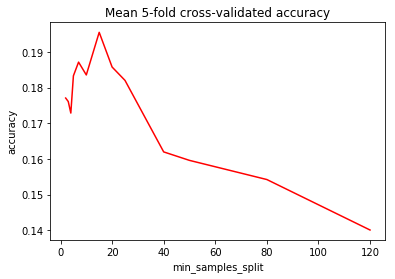

In [13]:
min_samples_splits = [2,3,4,5,7,10,15,20,25,40,50,80,120]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

0 --- 1e-05
[0.30769231 0.20930233 0.20930233 0.26506024 0.25925926 0.31168831
 0.31944444 0.31884058 0.27272727 0.23809524]
1 --- 0.0001
[0.35164835 0.31395349 0.27906977 0.34939759 0.2962963  0.38961039
 0.31944444 0.44927536 0.37878788 0.3015873 ]
2 --- 0.001
[0.3956044  0.3372093  0.3372093  0.45783133 0.37037037 0.38961039
 0.36111111 0.50724638 0.3030303  0.3968254 ]
3 --- 0.01
[0.3956044  0.31395349 0.40697674 0.40963855 0.37037037 0.38961039
 0.36111111 0.49275362 0.27272727 0.33333333]
4 --- 0.1
[0.36263736 0.30232558 0.34883721 0.31325301 0.2962963  0.28571429
 0.34722222 0.4057971  0.24242424 0.33333333]
5 --- 1
[0.28571429 0.24418605 0.29069767 0.25301205 0.25925926 0.25974026
 0.25       0.33333333 0.25757576 0.17460317]
6 --- 10
[0.21978022 0.26744186 0.20930233 0.24096386 0.19753086 0.18181818
 0.20833333 0.24637681 0.22727273 0.14285714]
7 --- 100


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

[0.1978022  0.20930233 0.19767442 0.22891566 0.19753086 0.15584416
 0.19444444 0.24637681 0.21212121 0.14285714]
8 --- 1000


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iter

[0.18681319 0.20930233 0.18604651 0.24096386 0.19753086 0.15584416
 0.19444444 0.24637681 0.21212121 0.14285714]


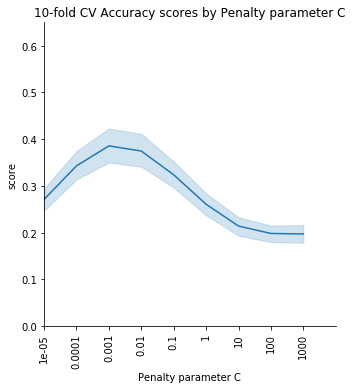

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
import pandas as pd

C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
results = []
for idx, c in enumerate(C):
    print(idx, "---", c)
    clf=LinearSVC(C=c, loss='squared_hinge', max_iter=100000, multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
    scores = cross_validate(clf,  histogramLabels[0], histogramLabels[1], cv=10)['test_score']
    print(scores)
    for score in scores:
        results.append({'score': score, 'x':idx, 'penalty':c})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", data=df_trace)
plt.xticks(range(len(C)), C, rotation='vertical')
plt.xlabel("Penalty parameter C")
plt.title("10-fold CV Accuracy scores by Penalty parameter C")
axes = plt.gca()
axes.set_ylim([0.0,0.65])
axes.set_xlim([0,len(C)])
plt.savefig('scaled_amz_C_eval.pdf')
plt.show()

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 0.2254425653028679
Test Set -- Mean Accuracy 0.13330286129688998
Training Set -- Mean Precision 0.17771042571201093
Test Set -- Mean Precision 0.08151294076294076
Training Set -- Mean Recall 0.19972526577920757
Test Set -- Mean Recall 0.1163888888888889


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 0.589188273879766
Test Set -- Mean Accuracy 0.2580430512672118
Training Set -- Mean Precision 0.5807345288922617
Test Set -- Mean Precision 0.23422919672919668
Training Set -- Mean Recall 0.5725122146406251
Test Set -- Mean Recall 0.2458333333333333


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 0.9258849638490944
Test Set -- Mean Accuracy 0.26421220468257955
Training Set -- Mean Precision 0.9295667039597675
Test Set -- Mean Precision 0.266515873015873
Training Set -- Mean Recall 0.9221199330472416
Test Set -- Mean Recall 0.2594444444444444


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.31943856882681954
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.31510052910052905
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3166666666666667


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3474080375379708
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3473531746031746
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.34249999999999997


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3641827434983375
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3516587301587301
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3608333333333333


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.38069257843318693
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3769563492063492
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3752777777777777


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3911101894704658
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.38762301587301584
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3822222222222222


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.38401880744344635
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.38444047619047617
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3786111111111111


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3858256518181862
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3974603174603174
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3791666666666667


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.39544584300072383
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.4042301587301587
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3916666666666667


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.40184308260186086
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.39606878306878307
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3938888888888889


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


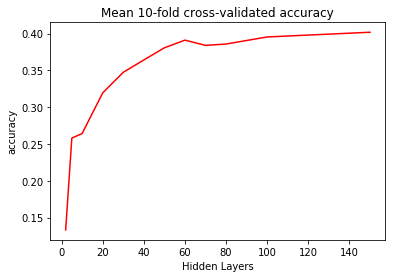

In [15]:
layers = [2,5,10,20,30,40,50,60,70,80,100,150]
results = []
for l in layers:
    clf = MLPClassifier(solver='lbfgs', alpha=1,hidden_layer_sizes=(l,), random_state=1)
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=10, scoring=scoring,return_train_score=True)
    print("Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print("Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print("Training Set --", "Mean Precision", scores['train_prec'].mean())
    print("Test Set --", "Mean Precision", scores['test_prec'].mean())
    print("Training Set --", "Mean Recall", scores['train_rec'].mean())
    print("Test Set --", "Mean Recall", scores['test_rec'].mean())
    results.append(scores['test_acc'].mean())

plt.plot(layers, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layers")
plt.title("Mean 10-fold cross-validated accuracy")
plt.show()

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3552557941352757
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.355079365079365
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3486111111111111


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3603034716903742
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.36390079365079364
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.35416666666666663


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3683435816780622
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.37606349206349204
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.36361111111111116


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.3662984510066976
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.3692063492063492
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.36416666666666664


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 1.0
Test Set -- Mean Accuracy 0.39544584300072383
Training Set -- Mean Precision 1.0
Test Set -- Mean Precision 0.4042301587301587
Training Set -- Mean Recall 1.0
Test Set -- Mean Recall 0.3916666666666667


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 0.9349637206545818
Test Set -- Mean Accuracy 0.4230601755404201
Training Set -- Mean Precision 0.9489593264307015
Test Set -- Mean Precision 0.40808333333333324
Training Set -- Mean Recall 0.9304538750680361
Test Set -- Mean Recall 0.41305555555555556


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages

Training Set -- Mean Accuracy 0.3081373931886283
Test Set -- Mean Accuracy 0.2665415018256617
Training Set -- Mean Precision 0.2393583462078801
Test Set -- Mean Precision 0.166959074639957
Training Set -- Mean Recall 0.27545264599954
Test Set -- Mean Recall 0.23888888888888885


D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


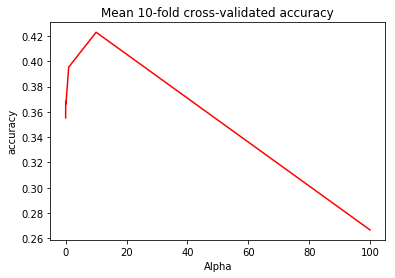

In [16]:
alphas = [0.0001,0.001,0.01,0.1,1,10,100]
results = []
for a in alphas:
    clf = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(100,), random_state=1)
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=10, scoring=scoring,return_train_score=True)
    print("Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print("Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print("Training Set --", "Mean Precision", scores['train_prec'].mean())
    print("Test Set --", "Mean Precision", scores['test_prec'].mean())
    print("Training Set --", "Mean Recall", scores['train_rec'].mean())
    print("Test Set --", "Mean Recall", scores['test_rec'].mean())
    results.append(scores['test_acc'].mean())

plt.plot(alphas, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Alpha")
plt.title("Mean 10-fold cross-validated accuracy")
plt.show()

In [19]:
%time ret=fruits.testModel()
print(ret)

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

ValueError: invalid literal for int() with base 10: 'guava'

[2 0 1 0 2 1 1 0 2 1 1 1 0 2 0 1 0 2 0 0 2 2 0 2 0 2 1 0 2 0 2 1 2 0 2 0 0
 2 0 1 0 1 1 2 1 2 0 2 1 1 0 0 1 2 1 1 0 0 2 0 1 1 2 0 0 0 2 0 1 2 0 2 2 2
 1 1 2 1 1 0 2 0 0 2 0 0 2 1 1 1 1 1 2 0 0 1 2 0 0 1 2 2 2 0 2 0 0 2 0 1 0
 0 1 2 0 0 1 0 1 0 0 2 0 0 2 0 2 0 2 0 2 1 1 1 1 2 0 1 1 1 1 1 2 1 2 2 1 0
 2 1 2 1 0 1 1 1 1 0 0 0 2 0 0 1 1 2 0 0 0 2 2 0 0 2 2 0 2 0 0 1 2 1 0 2 2
 2 1 0 2 1 2 0 1 1 2 0 2 2 0 1 2 2 0 0 2 1 0 0 1 2 0 1 1 2 2 0 2 1 2 1 1 1
 0 2 1 1 0 1 2 1 2 1 1 0 2 1 1 1 0 0 2 2 2 2 2 2 0 0 0 1 0 1 0 2 1 0 0 0 0
 0 2 2 1 1 0 2 2 2 1 1 0 0 1 1 1 2 1 1 2 2 1 0 0 0 0 1 0 2 2 1 2 0 2 2 1 2
 1 2 2 1 0 2 0 2 2 1 1 0 2 0 0 0 1 1 0 0 0 1 0 0 1 1 1 0 1 2 0 2 1 1 2 0 2
 2 2 1 2 0 0 1 0 1 0 0 2 0 0 1 2 2 0 1 1 2 1 0 1 2 1 2 0 1 0 2 1 2 0 2 0 2
 1 0 1 2 2 2 0 0 0 2 1 0 0 2 2 1 2 1 1 0 1 1 0 2 1 1 2 0 2 0 2 1 0 2 0 1 1
 1 2 2 0 2 2 0 1 0 2 0 1 1 2 2 1 0 0 0 2 0 0 1 0 0 1 0 1 2 0 2 2 1 1 1 0 0
 2 2 1 1 2 0 2 1 2 2 0 1 2 1 2 2 2 0 2 1 1 2 0 2 1 2 0 1 2 2 1 2 1 1 2 2 1
 0 2 2 1 1 1 0 0 0 2 0 1 

### Cars

In [31]:
%time cars.extractFeatures()

train image count:  1049
Computing Features for  0
Computing Features for  1
Wall time: 3.49 s


Cluster
n_images: 1049
descriptor_list length: 1049
Vocabulary Histogram Generated
Plotting histogram
[392 512 628 823 462 495 491 584 400 444 526 487 545 606 509 706 463 469
 679 414 674 809 514 740 450 558 976 929 474 456 507 533 515 679 553 495
 532 641 626 450 524 314 510 560 466 477 584 592 554 326 583 484 523 515
 493 561 618 562 524 481 532 572 532 615 511 557 407 738 489 594 532 556
 541 534 596 553 429 425 454 644 504 510 655 366 742 155 513 424 476 509
 437 502 404 482 545 787 462 681 605 470]


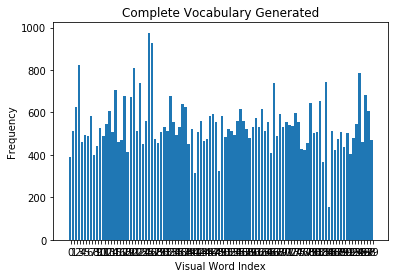

Nearest Centroid  -- Training Set -- Mean Accuracy 0.8894188092400249
Nearest Centroid  -- Test Set -- Mean Accuracy 0.8732285258601049
Nearest Centroid  -- Training Set -- Mean Precision 0.8893682503630502
Nearest Centroid  -- Test Set -- Mean Precision 0.8751277995960269
Nearest Centroid  -- Training Set -- Mean Recall 0.8902008430166326
Nearest Centroid  -- Test Set -- Mean Recall 0.874090909090909
Linear SVM  -- Training Set -- Mean Accuracy 0.955435041716329
Linear SVM  -- Test Set -- Mean Accuracy 0.8798997493734335
Linear SVM  -- Training Set -- Mean Precision 0.955266851213685
Linear SVM  -- Test Set -- Mean Precision 0.8798101056015476
Linear SVM  -- Training Set -- Mean Recall 0.9555287081339714
Linear SVM  -- Test Set -- Mean Recall 0.8796969696969696
Decision Tree  -- Training Set -- Mean Accuracy 1.0
Decision Tree  -- Test Set -- Mean Accuracy 0.8084164957849168
Decision Tree  -- Training Set -- Mean Precision 1.0
Decision Tree  -- Test Set -- Mean Precision 0.809557641922

In [32]:
%time cars.trainModel()

In [33]:
histogramLabels = cars.getHistogramLabels()

In [ ]:
min_samples_splits = [2,3,4,5,7,10,15,20,25,40,50,80,120]
results = []
for min_samples_split in min_samples_splits:
    clf = DecisionTreeClassifier(min_samples_split=min_samples_split)
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=5)
    results.append(scores['test_score'].mean())
    
plt.plot(min_samples_splits, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("min_samples_split")
plt.title("Mean 5-fold cross-validated accuracy")
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.svm import LinearSVC
import pandas as pd

C = [0.00001, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100,1000]
results = []
for idx, c in enumerate(C):
    print(idx, "---", c)
    clf=LinearSVC(C=c, loss='squared_hinge', max_iter=100000, multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)
    scores = cross_validate(clf,  histogramLabels[0], histogramLabels[1], cv=5)['test_score']
    print(scores)
    for score in scores:
        results.append({'score': score, 'x':idx, 'penalty':c})

df_trace = pd.DataFrame.from_dict(results)
g = sns.relplot(x="x", y="score", kind="line", data=df_trace)
plt.xticks(range(len(C)), C, rotation='vertical')
plt.xlabel("Penalty parameter C")
plt.title("10-fold CV Accuracy scores by Penalty parameter C")
axes = plt.gca()
axes.set_ylim([0.0,0.65])
axes.set_xlim([0,len(C)])
plt.savefig('scaled_amz_C_eval.pdf')
plt.show()

In [ ]:
layers = [2,5,10,20,30,40,50,60,70,80,100,150]
results = []
for l in layers:
    clf = MLPClassifier(solver='lbfgs', alpha=1,hidden_layer_sizes=(l,), random_state=1)
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=10, scoring=scoring,return_train_score=True)
    print("Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print("Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print("Training Set --", "Mean Precision", scores['train_prec'].mean())
    print("Test Set --", "Mean Precision", scores['test_prec'].mean())
    print("Training Set --", "Mean Recall", scores['train_rec'].mean())
    print("Test Set --", "Mean Recall", scores['test_rec'].mean())
    results.append(scores['test_acc'].mean())

plt.plot(layers, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Hidden Layers")
plt.title("Mean 10-fold cross-validated accuracy")
plt.show()

In [ ]:
alphas = [0.0001,0.001,0.01,0.1,1,10,100]
results = []
for a in alphas:
    clf = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(100,), random_state=1)
    scoring = {'acc': 'accuracy','prec': 'precision_macro','rec': 'recall_macro'}
    scores = cross_validate(clf, histogramLabels[0], histogramLabels[1], cv=10, scoring=scoring,return_train_score=True)
    print("Training Set --", "Mean Accuracy", scores['train_acc'].mean())
    print("Test Set --", "Mean Accuracy", scores['test_acc'].mean())
    print("Training Set --", "Mean Precision", scores['train_prec'].mean())
    print("Test Set --", "Mean Precision", scores['test_prec'].mean())
    print("Training Set --", "Mean Recall", scores['train_rec'].mean())
    print("Test Set --", "Mean Recall", scores['test_rec'].mean())
    results.append(scores['test_acc'].mean())

plt.plot(alphas, results, "r", label="Test Accuracy")
plt.ylabel("accuracy")
plt.xlabel("Alpha")
plt.title("Mean 10-fold cross-validated accuracy")
plt.show()

In [34]:
%time ret=cars.testModel()
print(ret)

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was

PREDICTED:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]
ACTUAL:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Program_Files\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [ ]:
def plot_confusion_matrix(y_actual, y_pred, categories, title='Confusion matrix', cmap=plt.cm.binary, size=(6,4)):
    s_actual = pd.Categorical(y_actual, categories=categories)
    s_pred = pd.Categorical(y_pred, categories=categories)
    df_confusion = pd.crosstab(s_actual, s_pred, dropna=False)
    plt.figure(figsize=size)
    plt.matshow(df_confusion, cmap=cmap, fignum=1)
    plt.title(title, y=1.1)
    plt.colorbar()
    tick_marks = np.arange(len(df_confusion.columns))
    plt.xticks(tick_marks, df_confusion.columns, rotation=90)
    plt.yticks(tick_marks, df_confusion.index)
    plt.ylabel("Actual")
    plt.xlabel("Predicted")

In [ ]:
plot_confusion_matrix(cars.ac)

In [38]:
sum([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
#len([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1])
108/170

0.6352941176470588